<a href="https://colab.research.google.com/github/gunndong/boston-housing-price-prediction/blob/main/boston_housing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

라이브러리 가져오기

In [2]:
# 데이터 처리 및 분석을 위한 라이브러리
import pandas as pd
import numpy as np

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# 머신러닝 모델 및 평가 도구
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

데이터 업로드

In [3]:
# Google Colab에 파일 업로드
from google.colab import files
uploaded = files.upload()

Saving BostonHousing.csv to BostonHousing.csv


In [4]:
# CSV 파일 읽기
data = pd.read_csv('BostonHousing.csv')  # 파일 이름에 맞게 수정
print(data.head())  # 데이터의 처음 5행 출력

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


탐색적 데이터 분석

In [5]:
# 데이터 구조 확인
print(data.info())

# 요약 통계 출력
print(data.describe())

# 결측치 확인
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     118 non-null    float64
 1   zn       118 non-null    float64
 2   indus    118 non-null    float64
 3   chas     118 non-null    int64  
 4   nox      118 non-null    float64
 5   rm       114 non-null    float64
 6   age      118 non-null    float64
 7   dis      118 non-null    float64
 8   rad      118 non-null    int64  
 9   tax      118 non-null    int64  
 10  ptratio  118 non-null    float64
 11  b        118 non-null    float64
 12  lstat    118 non-null    float64
 13  medv     118 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 13.0 KB
None
             crim          zn      indus   chas         nox          rm  \
count  118.000000  118.000000  118.00000  118.0  118.000000  114.000000   
mean     0.263984   10.495763    7.04322    0.0    0.480348    6.230123   
std  

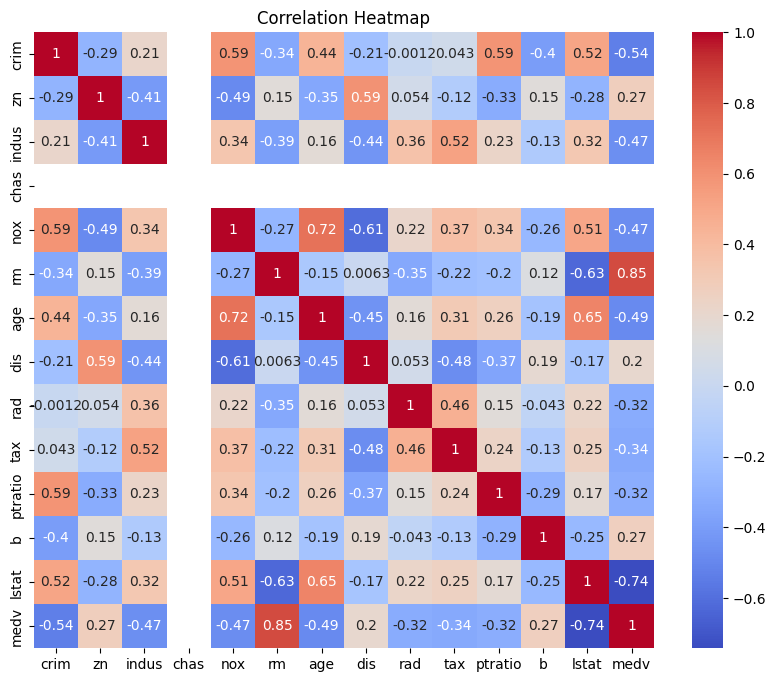

In [6]:
# 히트맵으로 상관관계 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

결측치 처리

In [7]:
# 결측치 확인 및 중앙값으로 채우기
rm_median = data['rm'].median()
data['rm'].fillna(rm_median, inplace=True)

# 결측치 처리 결과 확인
print(data.isnull().sum())


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


/tmp/ipython-input-1926052763.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rm'].fillna(rm_median, inplace=True)


데이터 전처리

In [8]:
# 독립 변수와 종속 변수 분리
X = data.drop(columns=['medv'])  # 'medv'를 제외한 나머지 열
y = data['medv']  # 목표 변수

# 학습용 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

선형회귀

In [9]:
# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = model.predict(X_test)

결과해석

In [10]:
# 성능 지표 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 7.630015927200283
Root Mean Squared Error (RMSE): 2.762248346401946
R-squared (R²): 0.8065329175674142


회귀 계수 확인

In [11]:
# 회귀 계수 출력
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

    Feature   Coefficient
0      crim -3.810563e+00
1        zn  5.257920e-03
2     indus -1.858240e-01
3      chas -1.411676e-12
4       nox  2.917037e+01
5        rm  8.917878e+00
6       age -7.285197e-02
7       dis  1.202322e-01
8       rad -1.733746e-01
9       tax -3.653650e-03
10  ptratio -3.642716e-02
11        b  1.298508e-02
12    lstat  4.559337e-02


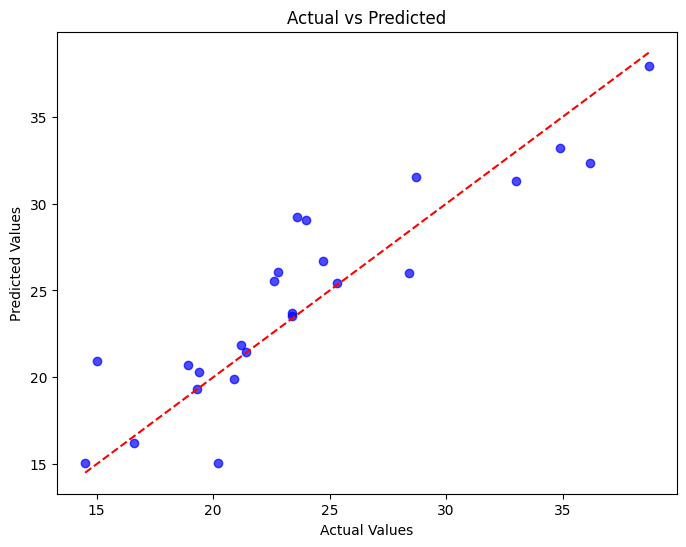

In [12]:
# 실제값 vs 예측값 시각화
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()